In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
place=pd.read_csv("place.csv")

In [3]:
place.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
place=place.fillna(0)

In [5]:
place.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD00703788>,
      dtype=object)

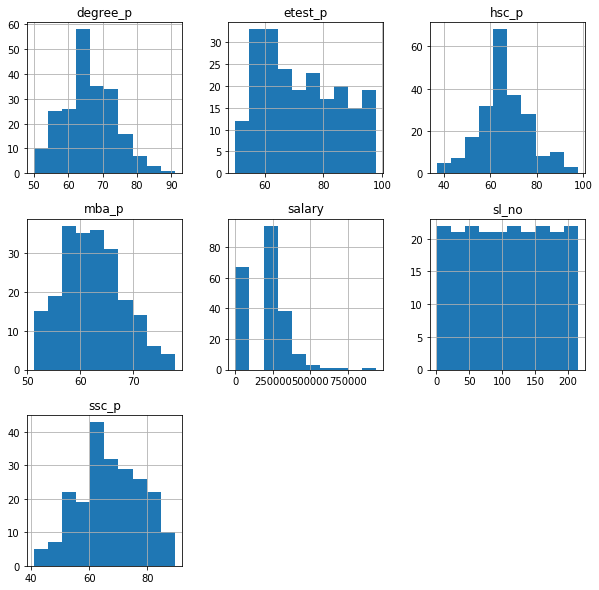

In [6]:
place.hist(figsize=(10,10))

In [7]:
sex=pd.get_dummies(place["gender"],drop_first=True)

In [8]:
place=pd.concat([place.drop("gender",axis=1),sex],axis=1)

In [9]:
place.isnull().sum()

sl_no             0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
M                 0
dtype: int64

In [10]:
board=pd.get_dummies(place["ssc_b"],drop_first=True)

In [11]:
place=pd.concat([place.drop("ssc_b",axis=1),board],axis=1)

In [12]:
stream=pd.get_dummies(place["hsc_s"])

In [13]:
place=pd.concat([place.drop("hsc_s",axis=1),stream],axis=1)

In [14]:
exp=pd.get_dummies(place["workex"],drop_first=True)

In [15]:
place=pd.concat([place.drop("workex",axis=1),exp],axis=1)

In [16]:
place.drop("Others",axis=1)

,sl_no,ssc_p,hsc_p,hsc_b,degree_p,degree_t,etest_p,specialisation,mba_p,status,salary,M,Arts,Commerce,Science,Yes
0,1,67.00,91.00,Others,58.00,Sci&Tech,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,1,0,0
1,2,79.33,78.33,Others,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,Placed,200000.0,1,0,0,1,1
2,3,65.00,68.00,Central,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,0,0,0
3,4,56.00,52.00,Central,52.00,Sci&Tech,66.0,Mkt&HR,59.43,Not Placed,0.0,1,0,0,1,0
4,5,85.80,73.60,Central,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,Placed,425000.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,Others,77.60,Comm&Mgmt,91.0,Mkt&Fin,74.49,Placed,400000.0,1,0,1,0,0
211,212,58.00,60.00,Others,72.00,Sci&Tech,74.0,Mkt&Fin,53.62,Placed,275000.0,1,0,0,1,0
212,213,67.00,67.00,Others,73.00,Comm&Mgmt,59.0,Mkt&Fin,69.72,Placed,295000.0,1,0,1,0,1
213,214,74.00,66.00,Others,58.00,Comm&Mgmt,70.0,Mkt&HR,60.23,Placed,204000.0,0,0,1,0,0


In [17]:
place=place.drop("Others",axis=1)

In [18]:
place=place.drop("hsc_b",axis=1)

In [19]:
sa=pd.get_dummies(place["degree_t"],drop_first=True)

In [20]:
place=pd.concat([place.drop("degree_t",axis=1),sa],axis=1)

In [21]:
special=pd.get_dummies(place["specialisation"],drop_first=True)

In [22]:
place=pd.concat([place.drop("specialisation",axis=1),special],axis=1)

In [23]:
pla=pd.get_dummies(place["status"])

In [24]:
place=pd.concat([place.drop("status",axis=1),pla],axis=1)

In [25]:
place=place.drop("sl_no",axis=1)

In [26]:
place=place.drop("Not Placed",axis=1)
place=place.drop("salary",axis=1)
place=place.rename(columns={"ssc_p":"10th_p","hsc_p":"12th_p","Yes":"work_exp","M":"gender","Mkt&HR":"mba_spl"})

In [27]:
place=place.drop("Others",axis=1)
place=place.drop("Sci&Tech",axis=1)
place.head(5)

,10th_p,12th_p,degree_p,etest_p,mba_p,gender,Arts,Commerce,Science,work_exp,mba_spl,Placed
0,67.00,91.00,58.00,55.0,58.80,1,0,1,0,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,1,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,1,0,0,0,1


In [ ]:
#Separating features and output

In [28]:
X=place.drop("Placed",axis=1)
y=place["Placed"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [55]:
#Logistic regression Model

In [30]:
logmodel=LogisticRegression(max_iter=5000)

In [31]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions=logmodel.predict(X_test)

In [33]:
place.head(5)

,10th_p,12th_p,degree_p,etest_p,mba_p,gender,Arts,Commerce,Science,work_exp,mba_spl,Placed
0,67.00,91.00,58.00,55.0,58.80,1,0,1,0,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,1,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,1,0,0,0,1


In [34]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.93      0.82      0.87        17\n           1       0.92      0.97      0.95        37\n\n    accuracy                           0.93        54\n   macro avg       0.93      0.90      0.91        54\nweighted avg       0.93      0.93      0.92        54\n'

In [35]:
confusion_matrix(y_test,predictions)

array([[14,  3],
       [ 1, 36]], dtype=int64)

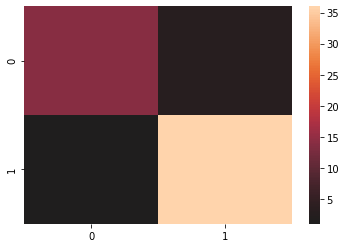

In [36]:
sns.heatmap(confusion_matrix(y_test,predictions),center=True)
plt.show(10,10)

In [37]:
accuracy_score(y_test,predictions)

0.9259259259259259

In [38]:
logmodel.predict([[56,53,52,66,59.4,1,0,0,1,0,1]])

array([0], dtype=uint8)

In [39]:
logmodel.predict([[79,78.50,77.22,85,66.14,1,0,0,1,1,0]])

array([1], dtype=uint8)

In [ ]:
#MLP Model

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(place.drop(["Placed"],axis=1))

In [41]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=5000 ,activation='logistic',alpha=0.001,epsilon=1E-08)
mlp_model.fit(X_train,y_train)
y_pred = mlp_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9259259259259259

In [42]:
mlp_model.predict([[79,78.50,77.22,85,66.14,1,0,0,1,1,0]])

array([1], dtype=uint8)

In [43]:
mlp_model.predict([[55,52.50,52.20,65,58,1,0,0,1,0,1]])

array([0], dtype=uint8)

In [54]:
#SVM Model

In [50]:
from sklearn import svm, datasets
clf=svm.SVC(kernel='linear',C=1).fit(X_train,y_train)

In [51]:
classifier_predictions=clf.predict(X_test)
print(accuracy_score(y_test,classifier_predictions))

0.9074074074074074


In [52]:
a=[[55,52.50,52.20,65,58,1,0,0,1,0,1]]
p=clf.predict(a)
print(p)

[0]
